In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

In [2]:
final_model = pickle.load(open('trained_models/reg_stats_rf.pkl', 'rb'))

In [3]:
df = pd.read_csv('data/auction_stats.csv')
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']

# Plotting Capped versus UnCapped

0.7316923816891212
0.8456902454497897


Text(0, 0.5, 'Predicted Price')

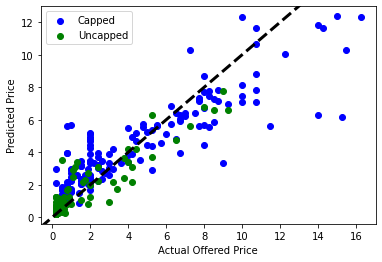

In [4]:
df1 = df[df['isCapped']==1]
X1 = df1.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y1 = df1['Amount']
y11 = final_model.predict(X1)
df2 = df[df['isCapped']==0]
X2 = df2.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y2 = df2['Amount']
y22 = final_model.predict(X2)
print(r2_score(y1,y11))
print(r2_score(y2,y22))

plt.scatter(y1, y11, c ="blue", label = 'Capped')
plt.scatter(y2, y22, c="green", label = 'Uncapped')
plt.legend()
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual Offered Price')
plt.ylabel('Predicted Price')

# Plotting overseas versus Indian

0.7628260295388727
0.8349322505130005


Text(0, 0.5, 'Predicted Price')

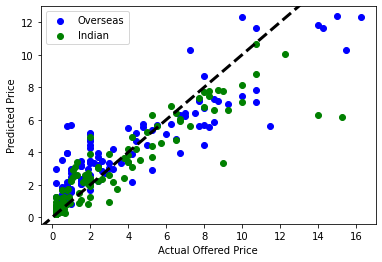

In [5]:
df1 = df[df['isOverseas']==1]
X1 = df1.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y1 = df1['Amount']
y11 = final_model.predict(X1)
df2 = df[df['isOverseas']==0]
X2 = df2.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y2 = df2['Amount']
y22 = final_model.predict(X2)
print(r2_score(y1,y11))
print(r2_score(y2,y22))

plt.scatter(y1, y11, c ="blue", label = 'Overseas')
plt.scatter(y2, y22, c="green", label = 'Indian')
plt.legend()
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual Offered Price')
plt.ylabel('Predicted Price')

0.8314190763316811
0.7987831584381058
0.6857954527917027


Text(0, 0.5, 'Predicted Price')

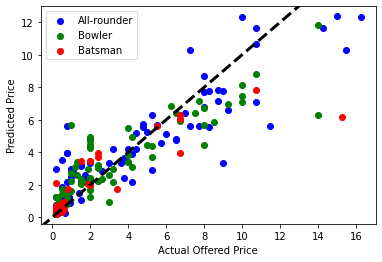

In [6]:
df1 = df[(df['isBowler']==1) & (df['isBatsman']==1)]
X1 = df1.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y1 = df1['Amount']
y11 = final_model.predict(X1)
df2 = df[(df['isBowler']==1) & (df['isBatsman']==0)]
X2 = df2.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y2 = df2['Amount']
y22 = final_model.predict(X2)
df3 = df[(df['isBowler']==0) & (df['isBatsman']==0)]
X3 = df3.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y3 = df3['Amount']
y33 = final_model.predict(X3)
print(r2_score(y1,y11))
print(r2_score(y2,y22))
print(r2_score(y3,y33))


plt.scatter(y1, y11, c ="blue", label = 'All-rounder')
plt.scatter(y2, y22, c="green", label = 'Bowler')
plt.scatter(y3, y33, c="red", label = 'Batsman')
plt.legend()
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual Offered Price')
plt.ylabel('Predicted Price')